In [1]:
library(caretEnsemble)
library(RColorBrewer)
library(tm)
library(datarium)
library(leaps)
library(glmnet)
library(pls)
library(gam)
library(splines)
library(MVA)
library(nortest)
library(mvnormtest)
library(pastecs)
library(mvtnorm)
library(igraph)
library(dplyr)
library(ggplot2)
library(ggraph)
library(caret)
library(car)
library(mlbench)
library(tidyverse)
library(MASS)
library(ISLR)
library(psych)
library(faraway)
library(pls)
library(Matrix)
library(stats)
library(biotools)
library(ggpubr)
library(broom)
library(leaps)
library(tidyverse)
library(funModeling)
library(Hmisc)
library(rpart)
library(readr)
library(party)
library(partykit)
library(rpart.plot)
library(stringr)
library(reshape2)

Loading required package: NLP

Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


Loading required package: splines

Loading required package: foreach

Loaded gam 1.20


Loading required package: HSAUR2

Loading required package: tools


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:pastecs’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


The following ob

In [2]:
data01 <- read.csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding="latin1")
head(data01)

,Area.Code,Area,Months.Code,Months,Element.Code,Element,Unit,Y1961,Y1962,Y1963,⋯,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,⋯,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,⋯,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
3,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,⋯,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,⋯,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
5,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,⋯,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7003,March,6078,Standard Deviation,°C,1.512,1.512,1.512,⋯,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512


In [3]:
# Check the dimensions
dim(data01)

[1] 9656   66

In [7]:
#Get the unique values of columns Months
unique(data01[c("Months")])

,Months
,<chr>
1,January
3,February
5,March
7,April
9,May
11,June
13,July
15,August
17,September


In [8]:
# Get values where months is in : 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
data02 <- data01 %>% filter(Months %in% c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
                               "November", "December"))

In [9]:
#Turn years columns into rows using melt function
data03 <- melt(data02, id.vars=c("Area.Code", "Area", "Months.Code", "Months", "Element.Code", "Element", "Unit"))
head(data03)

,Area.Code,Area,Months.Code,Months,Element.Code,Element,Unit,variable,value
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<fct>,<dbl>
1,2,Afghanistan,7001,January,7271,Temperature change,°C,Y1961,0.777
2,2,Afghanistan,7001,January,6078,Standard Deviation,°C,Y1961,1.950
3,2,Afghanistan,7002,February,7271,Temperature change,°C,Y1961,-1.743
4,2,Afghanistan,7002,February,6078,Standard Deviation,°C,Y1961,2.597
5,2,Afghanistan,7003,March,7271,Temperature change,°C,Y1961,0.516
6,2,Afghanistan,7003,March,6078,Standard Deviation,°C,Y1961,1.512


In [10]:
# Rename column where names is "variable" and "value"
names(data03)[names(data03) == "variable"] <- "Years"
names(data03)[names(data03) == "value"] <- "Value"
head(data03)

,Area.Code,Area,Months.Code,Months,Element.Code,Element,Unit,Years,Value
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<fct>,<dbl>
1,2,Afghanistan,7001,January,7271,Temperature change,°C,Y1961,0.777
2,2,Afghanistan,7001,January,6078,Standard Deviation,°C,Y1961,1.950
3,2,Afghanistan,7002,February,7271,Temperature change,°C,Y1961,-1.743
4,2,Afghanistan,7002,February,6078,Standard Deviation,°C,Y1961,2.597
5,2,Afghanistan,7003,March,7271,Temperature change,°C,Y1961,0.516
6,2,Afghanistan,7003,March,6078,Standard Deviation,°C,Y1961,1.512


In [11]:
# Years without the 'Y' letter
data04 <- data03 %>%
      mutate_at("Years", str_replace, "Y", "")

In [12]:
head(data04)

,Area.Code,Area,Months.Code,Months,Element.Code,Element,Unit,Years,Value
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0.777
2,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1961,1.950
3,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1.743
4,2,Afghanistan,7002,February,6078,Standard Deviation,°C,1961,2.597
5,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0.516
6,2,Afghanistan,7003,March,6078,Standard Deviation,°C,1961,1.512


In [14]:
sum(is.na(data04))

[1] 55211

In [15]:
data04 <- na.omit(data04)

In [16]:
sum(is.na(data04))

[1] 0

In [4]:
data01_eda <- function(data01)
{
  glimpse(data01)
  print(status(data01))
  freq(data01) 
  print(profiling_num(data01))
  plot_num(data01)
  describe(data01)
}

Rows: 9,656
Columns: 66
$ Area.Code    <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ Area         <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan…
$ Months.Code  <int> 7001, 7001, 7002, 7002, 7003, 7003, 7004, 7004, 7005, 700…
$ Months       <chr> "January", "January", "February", "February", "March", "M…
$ Element.Code <int> 7271, 6078, 7271, 6078, 7271, 6078, 7271, 6078, 7271, 607…
$ Element      <chr> "Temperature change", "Standard Deviation", "Temperature …
$ Unit         <chr> "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C…
$ Y1961        <dbl> 0.777, 1.950, -1.743, 2.597, 0.516, 1.512, -1.709, 1.406,…
$ Y1962        <dbl> 0.062, 1.950, 2.465, 2.597, 1.336, 1.512, 0.117, 1.406, -…
$ Y1963        <dbl> 2.744, 1.950, 3.919, 2.597, 0.403, 1.512, 0.919, 1.406, -…
$ Y1964        <dbl> -5.232, 1.950, -0.202, 2.597, 1.659, 1.512, -0.533, 1.406…
$ Y1965        <dbl> 1.868, 1.950, -0.096, 2.597, -0.909, 1.512, -1.816, 1.406…
$ Y1966        <

Warning message in freq_logic(data = data, input = input[i], plot, na.rm, path_out = path_out):
“Skipping plot for variable 'Area' (more than 100 categories)”


                                            Area frequency percentage
1                                    Afghanistan        34       0.35
2                                         Africa        34       0.35
3                                        Albania        34       0.35
4                                        Algeria        34       0.35
5                                 American Samoa        34       0.35
6                                       Americas        34       0.35
7                                        Andorra        34       0.35
8                                         Angola        34       0.35
9                                       Anguilla        34       0.35
10                             Annex I countries        34       0.35
11                                    Antarctica        34       0.35
12                           Antigua and Barbuda        34       0.35
13                                     Argentina        34       0.35
14                  

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


                  Months frequency percentage cumulative_perc
1                  April       568       5.88            5.88
2                 August       568       5.88           11.76
3               December       568       5.88           17.64
4  Dec\u0096Jan\u0096Feb       568       5.88           23.52
5               February       568       5.88           29.40
6                January       568       5.88           35.28
7                   July       568       5.88           41.16
8                   June       568       5.88           47.04
9  Jun\u0096Jul\u0096Aug       568       5.88           52.92
10 Mar\u0096Apr\u0096May       568       5.88           58.80
11                 March       568       5.88           64.68
12                   May       568       5.88           70.56
13   Meteorological year       568       5.88           76.44
14              November       568       5.88           82.32
15               October       568       5.88           88.20
16 Sep\u

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


             Element frequency percentage cumulative_perc
1 Standard Deviation      4828         50              50
2 Temperature change      4828         50             100



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


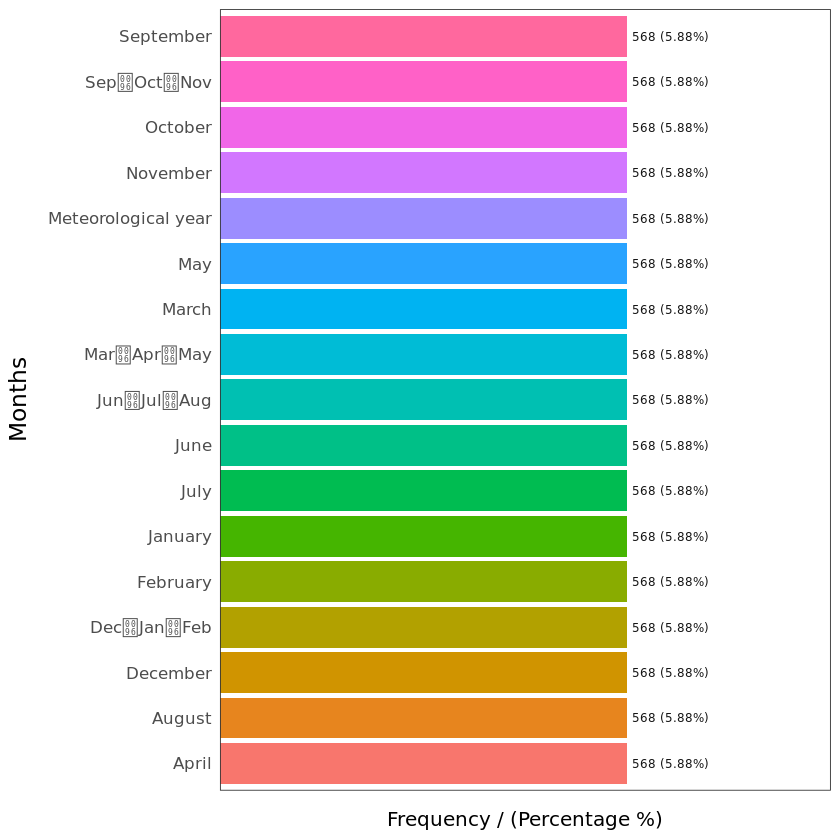

  Unit frequency percentage cumulative_perc
1   °C      9656        100             100

       variable         mean      std_dev variation_coef       p_01       p_05
1     Area.Code  821.8063380 1781.0722132   2.1672651216    3.00000   15.00000
2   Months.Code 7009.8823529    6.0382550   0.0008613918 7001.00000 7001.00000
3  Element.Code 6674.5000000  596.5308899   0.0893746183 6078.00000 6078.00000
4         Y1961    0.4024326    0.7015668   1.7433150141   -1.43356   -0.62170
5         Y1962    0.3155267    0.7137775   2.2621779303   -1.89564   -0.72480
6         Y1963    0.3173926    0.8531333   2.6879434840   -2.94170   -0.80135
7         Y1964    0.2693823    0.7492159   2.7812363148   -1.88574   -0.86445
8         Y1965    0.2178387    0.7394185   3.3943399317   -1.84300   -0.91600
9         Y1966    0.3764192    0.7373698   1.9589059153   -1.68411   -0.61400
10        Y1967    0.2632386    0.7254210   2.7557543098   -1.71980   -0.83400
11        Y1968    0.2448705    0.7549000 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


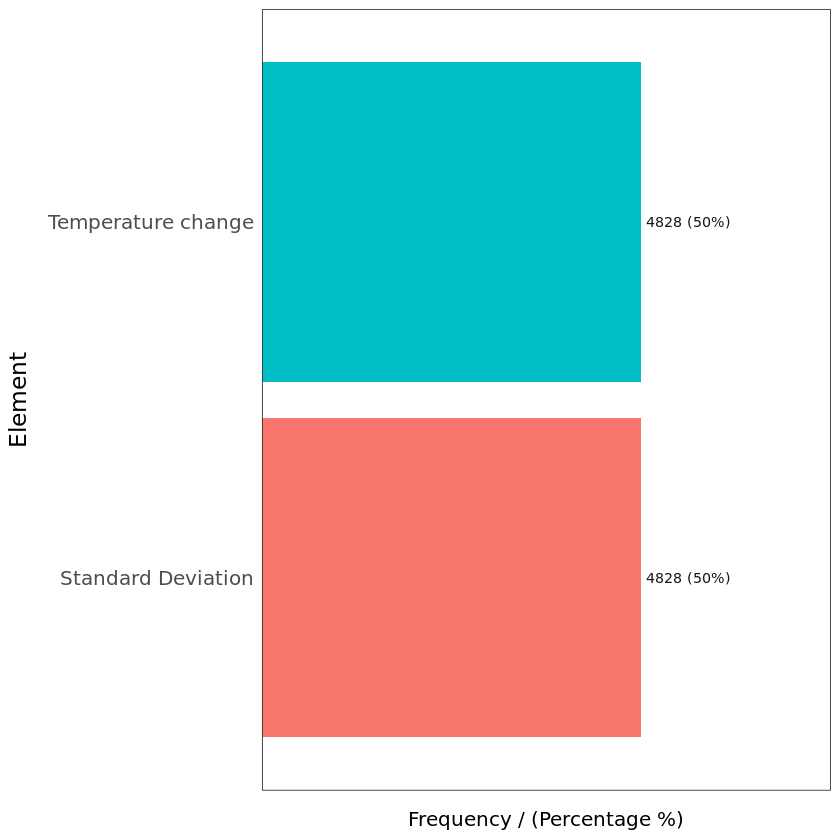

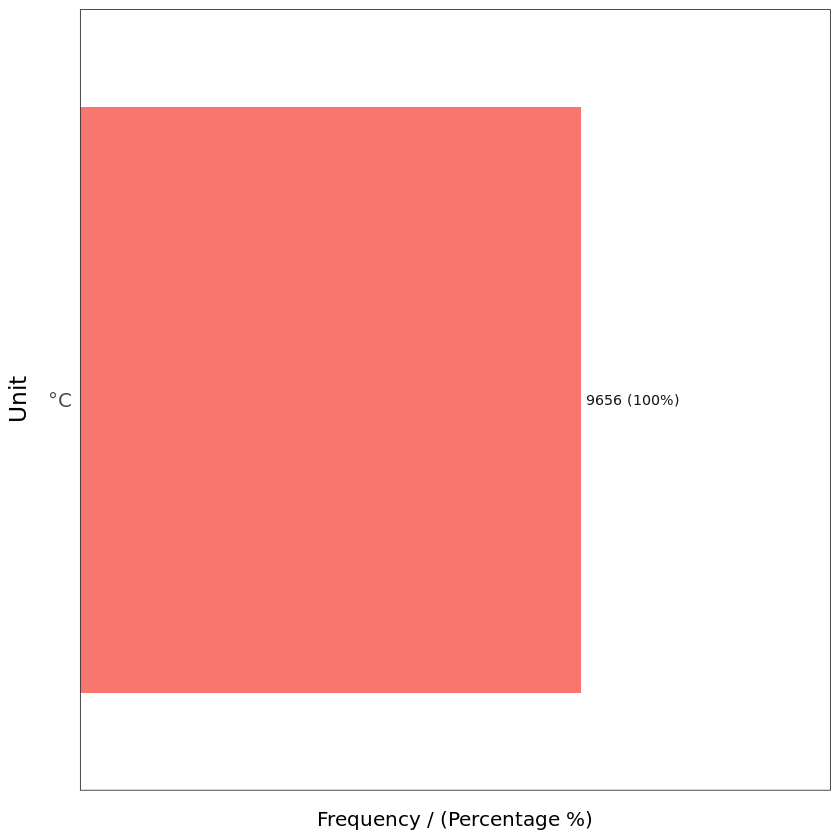

data01 

 66  Variables      9656  Observations
--------------------------------------------------------------------------------
Area.Code 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    9656        0      284        1    821.8     1269     15.0     32.0 
     .25      .50      .75      .90      .95 
    78.0    153.5    226.2   5203.0   5404.0 

lowest :    1    2    3    4    5, highest: 5815 5817 5848 5849 5873
                                                                            
Value          0    50   100   150   200   250   300   350  5000  5100  5200
Frequency    782  1598  1530  1598  1700  1054   102    34    34   204   170
Proportion 0.081 0.165 0.158 0.165 0.176 0.109 0.011 0.004 0.004 0.021 0.018
                                              
Value       5300  5400  5500  5700  5800  5850
Frequency    204   170   170    34   170   102
Proportion 0.021 0.018 0.018 0.004 0.018 0.011

For the frequency table, variable is rounded to the nea

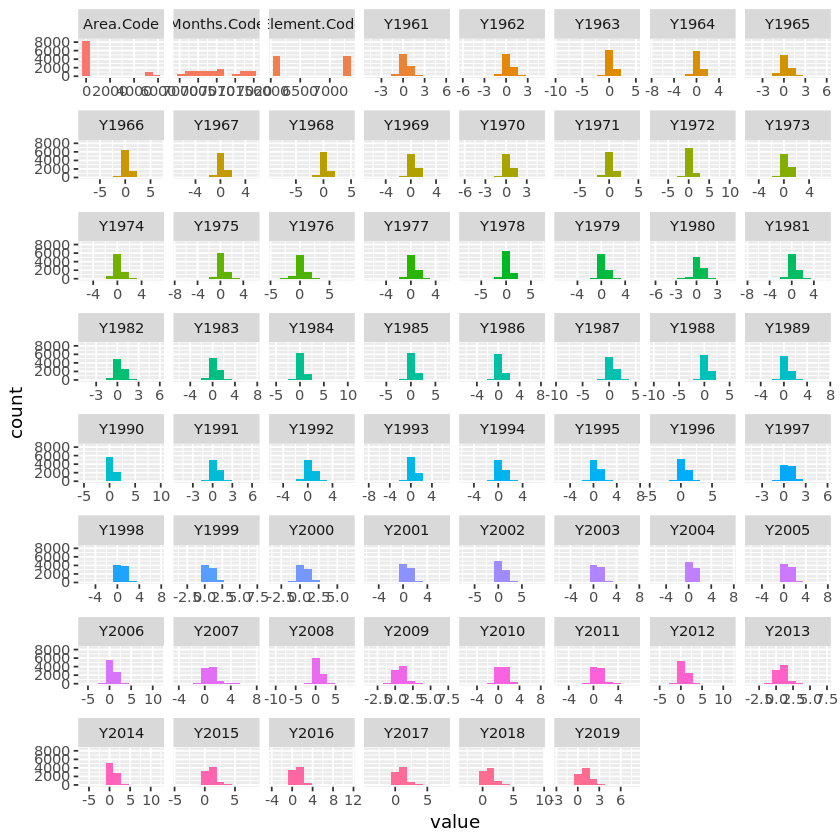

In [6]:
data01_eda(data01)

Rows: 346,933
Columns: 9
$ Area.Code    <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ Area         <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan…
$ Months.Code  <int> 7001, 7001, 7002, 7002, 7003, 7003, 7004, 7004, 7005, 700…
$ Months       <chr> "January", "January", "February", "February", "March", "M…
$ Element.Code <int> 7271, 6078, 7271, 6078, 7271, 6078, 7271, 6078, 7271, 607…
$ Element      <chr> "Temperature change", "Standard Deviation", "Temperature …
$ Unit         <chr> "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C…
$ Years        <chr> "1961", "1961", "1961", "1961", "1961", "1961", "1961", "…
$ Value        <dbl> 0.777, 1.950, -1.743, 2.597, 0.516, 1.512, -1.709, 1.406,…
                 variable q_zeros      p_zeros q_na p_na q_inf p_inf      type
Area.Code       Area.Code       0 0.0000000000    0    0     0     0   integer
Area                 Area       0 0.0000000000    0    0     0     0 character
Months.Code   Mont

Warning message in freq_logic(data = data, input = input[i], plot, na.rm, path_out = path_out):
“Skipping plot for variable 'Area' (more than 100 categories)”


                                            Area frequency percentage
1                                    Afghanistan      1416       0.41
2                                         Africa      1416       0.41
3                                        Albania      1416       0.41
4                                        Algeria      1416       0.41
5                                       Americas      1416       0.41
6                                        Andorra      1416       0.41
7                                         Angola      1416       0.41
8                                       Anguilla      1416       0.41
9                              Annex I countries      1416       0.41
10                                    Antarctica      1416       0.41
11                                     Argentina      1416       0.41
12                                          Asia      1416       0.41
13                                     Australia      1416       0.41
14                  

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


      Months frequency percentage cumulative_perc
1   February     28952       8.35            8.35
2   December     28939       8.34           16.69
3    October     28928       8.34           25.03
4       June     28915       8.33           33.36
5        May     28909       8.33           41.69
6       July     28907       8.33           50.02
7    January     28906       8.33           58.35
8     August     28902       8.33           66.68
9   November     28899       8.33           75.01
10     April     28897       8.33           83.34
11     March     28890       8.33           91.67
12 September     28889       8.33          100.00



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


             Element frequency percentage cumulative_perc
1 Temperature change    179792      51.82           51.82
2 Standard Deviation    167141      48.18          100.00



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


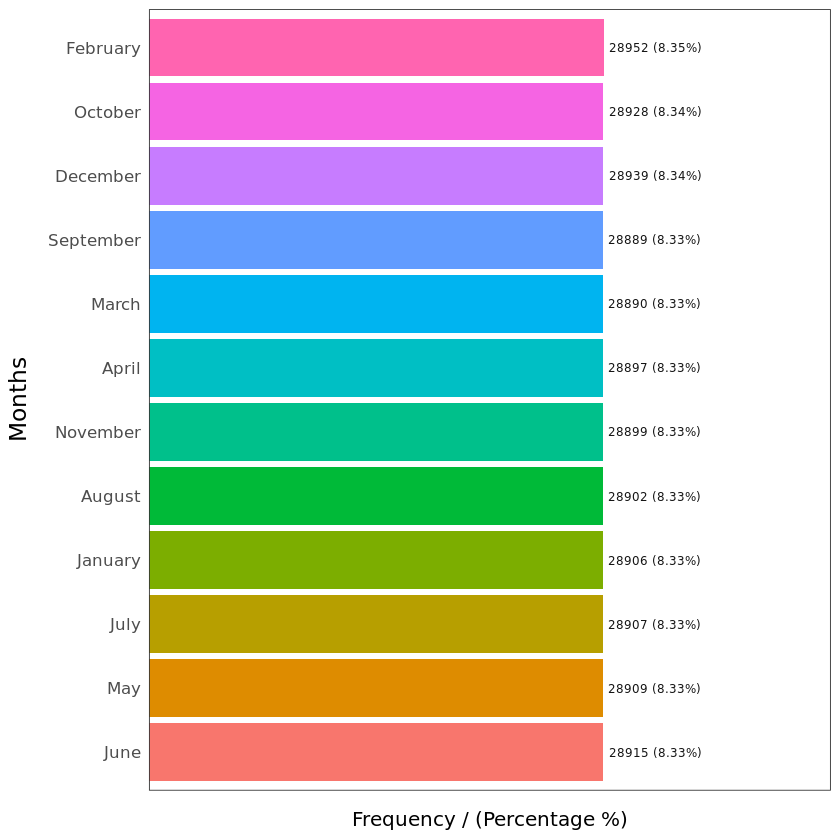

  Unit frequency percentage cumulative_perc
1   °C    346933        100             100



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


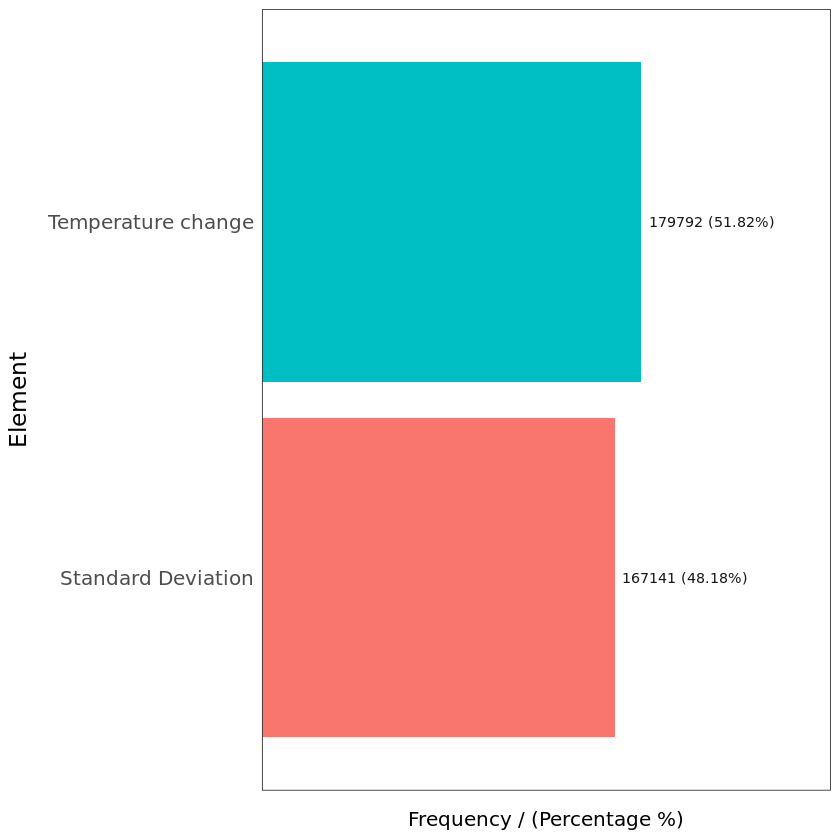

   Years frequency percentage cumulative_perc
1   2007      6020       1.74            1.74
2   2006      6005       1.73            3.47
3   2008      5977       1.72            5.19
4   1996      5957       1.72            6.91
5   2010      5957       1.72            8.63
6   2005      5950       1.72           10.35
7   2011      5948       1.71           12.06
8   2013      5948       1.71           13.77
9   2009      5944       1.71           15.48
10  1995      5935       1.71           17.19
11  2004      5935       1.71           18.90
12  1973      5925       1.71           20.61
13  2003      5921       1.71           22.32
14  1994      5917       1.71           24.03
15  2014      5911       1.70           25.73
16  1974      5910       1.70           27.43
17  1966      5904       1.70           29.13
18  1998      5904       1.70           30.83
19  2017      5904       1.70           32.53
20  2019      5903       1.70           34.23
21  2015      5898       1.70     

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


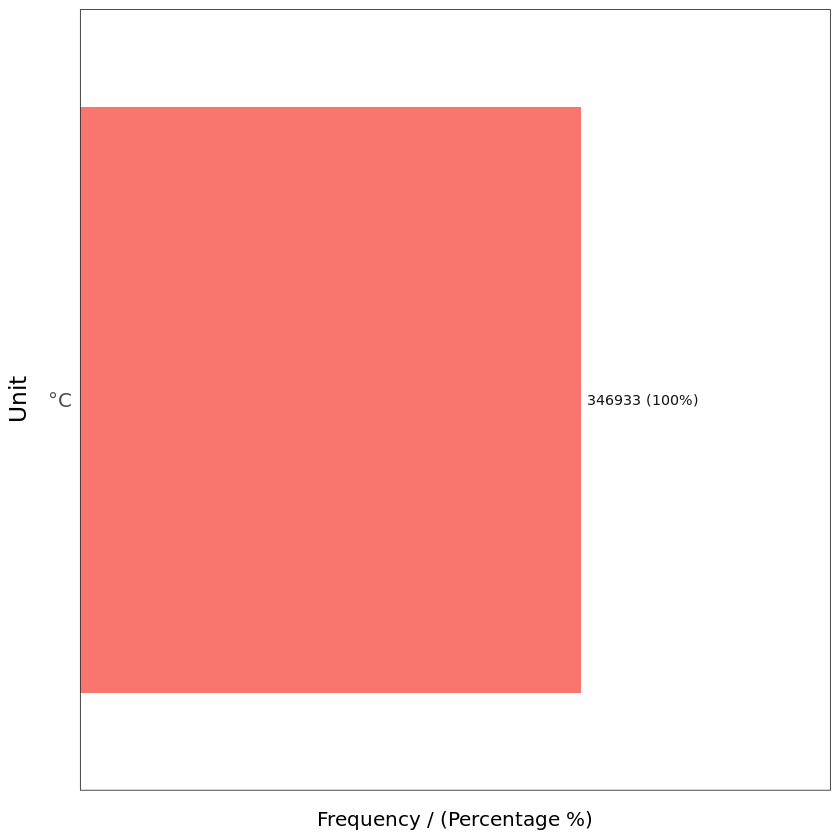

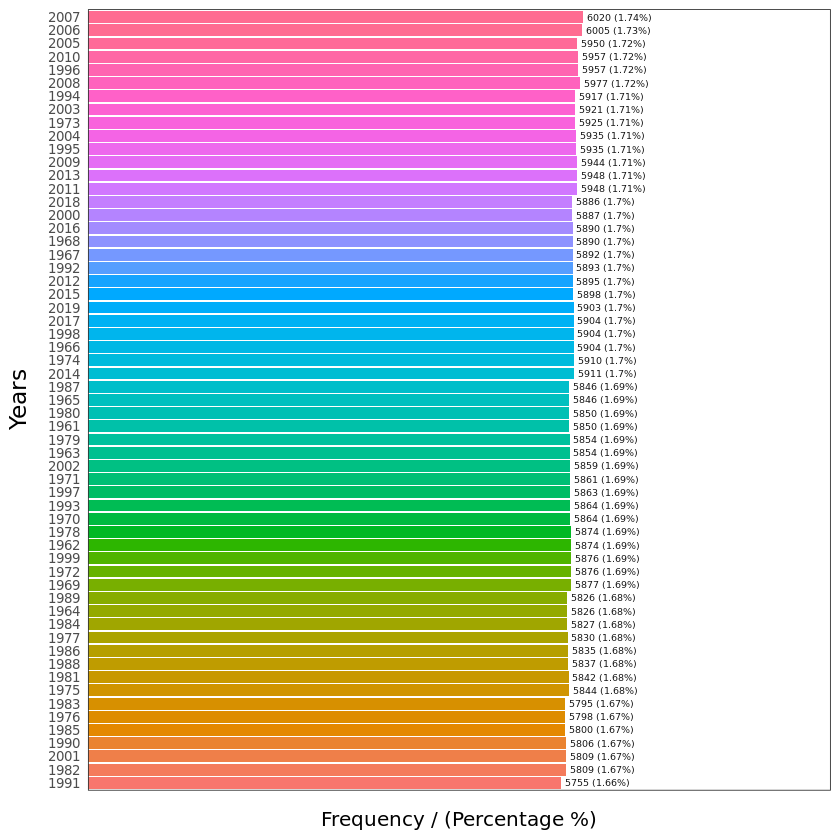

data04 

 9  Variables      346933  Observations
--------------------------------------------------------------------------------
Area.Code 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  346933        0      284        1    911.2     1403       14       28 
     .25      .50      .75      .90      .95 
      74      150      226     5207     5501 

lowest :    1    2    3    4    5, highest: 5815 5817 5848 5849 5873
                                                                            
Value          0    50   100   150   200   250   300   350  5000  5100  5200
Frequency  30484 57165 58164 55021 59173 32566  1632  1416  1416  8496  7080
Proportion 0.088 0.165 0.168 0.159 0.171 0.094 0.005 0.004 0.004 0.024 0.020
                                              
Value       5300  5400  5500  5700  5800  5850
Frequency   7416  7080  7080  1416  7080  4248
Proportion 0.021 0.020 0.020 0.004 0.020 0.012

For the frequency table, variable is rounded to the ne

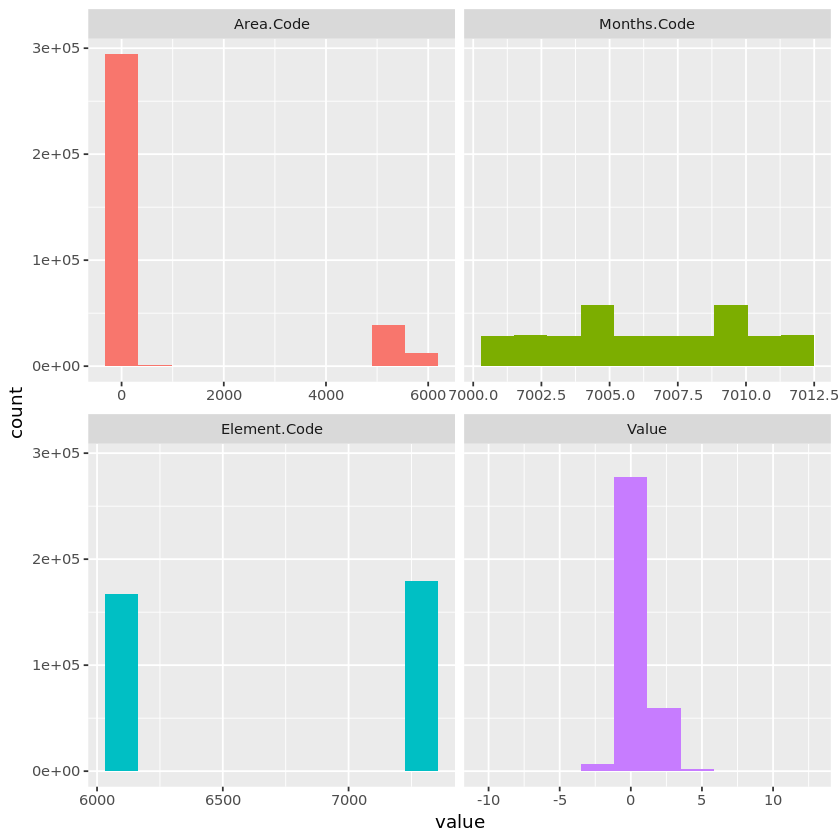

In [17]:
data04_eda <- function(data04)
{
  glimpse(data04)
  print(status(data04))
  freq(data04) 
  print(profiling_num(data04))
  plot_num(data04)
  describe(data04)
}
data04_eda(data04)

In [21]:
data04$Years <- as.integer(data04$Years)
data04$Value <- as.numeric(data04$Value)
head(data04)

,Area.Code,Area,Months.Code,Months,Element.Code,Element,Unit,Years,Value
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>
1,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0
2,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1961,1
3,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1
4,2,Afghanistan,7002,February,6078,Standard Deviation,°C,1961,2
5,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0
6,2,Afghanistan,7003,March,6078,Standard Deviation,°C,1961,1


In [34]:
data04$Area <- as.factor(data04$Area)
data04$Months <- as.factor(data04$Months)
data04$Element <- as.factor(data04$Element)
str(data04)

'data.frame':	346933 obs. of  9 variables:
 $ Area.Code   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Area        : Factor w/ 284 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Months.Code : int  7001 7001 7002 7002 7003 7003 7004 7004 7005 7005 ...
 $ Months      : Factor w/ 12 levels "April","August",..: 5 5 4 4 8 8 1 1 9 9 ...
 $ Element.Code: int  7271 6078 7271 6078 7271 6078 7271 6078 7271 6078 ...
 $ Element     : Factor w/ 2 levels "Standard Deviation",..: 2 1 2 1 2 1 2 1 2 1 ...
 $ Unit        : chr  "°C" "°C" "°C" "°C" ...
 $ Years       : int  1961 1961 1961 1961 1961 1961 1961 1961 1961 1961 ...
 $ Value       : num  0 1 -1 2 0 1 -1 1 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:55211] 241 242 243 244 245 246 247 248 249 250 ...
  ..- attr(*, "names")= chr [1:55211] "241" "242" "243" "244" ...


Rows: 346,933
Columns: 9
$ Area.Code    <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ Area         <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan…
$ Months.Code  <int> 7001, 7001, 7002, 7002, 7003, 7003, 7004, 7004, 7005, 700…
$ Months       <fct> January, January, February, February, March, March, April…
$ Element.Code <int> 7271, 6078, 7271, 6078, 7271, 6078, 7271, 6078, 7271, 607…
$ Element      <fct> Temperature change, Standard Deviation, Temperature chang…
$ Unit         <chr> "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C", "°C…
$ Years        <int> 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 196…
$ Value        <dbl> 0, 1, -1, 2, 0, 1, -1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, -…
                 variable q_zeros   p_zeros q_na p_na q_inf p_inf      type
Area.Code       Area.Code       0 0.0000000    0    0     0     0   integer
Area                 Area       0 0.0000000    0    0     0     0    factor
Months.Code   Months.Code  

Warning message in freq_logic(data = data, input = input[i], plot, na.rm, path_out = path_out):
“Skipping plot for variable 'Area' (more than 100 categories)”


                                            Area frequency percentage
1                                    Afghanistan      1416       0.41
2                                         Africa      1416       0.41
3                                        Albania      1416       0.41
4                                        Algeria      1416       0.41
5                                       Americas      1416       0.41
6                                        Andorra      1416       0.41
7                                         Angola      1416       0.41
8                                       Anguilla      1416       0.41
9                              Annex I countries      1416       0.41
10                                    Antarctica      1416       0.41
11                                     Argentina      1416       0.41
12                                          Asia      1416       0.41
13                                     Australia      1416       0.41
14                  

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


      Months frequency percentage cumulative_perc
1   February     28952       8.35            8.35
2   December     28939       8.34           16.69
3    October     28928       8.34           25.03
4       June     28915       8.33           33.36
5        May     28909       8.33           41.69
6       July     28907       8.33           50.02
7    January     28906       8.33           58.35
8     August     28902       8.33           66.68
9   November     28899       8.33           75.01
10     April     28897       8.33           83.34
11     March     28890       8.33           91.67
12 September     28889       8.33          100.00



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


             Element frequency percentage cumulative_perc
1 Temperature change    179792      51.82           51.82
2 Standard Deviation    167141      48.18          100.00



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


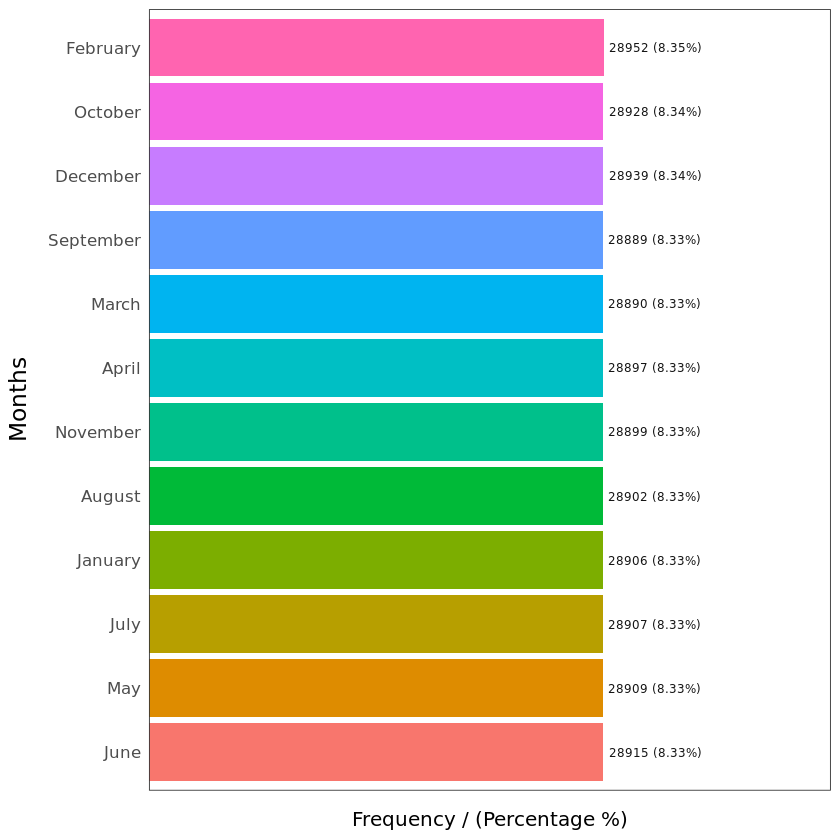

  Unit frequency percentage cumulative_perc
1   °C    346933        100             100

      variable         mean     std_dev variation_coef p_01 p_05 p_25 p_50 p_75
1    Area.Code  911.1922187 1880.657776   2.0639528493    4   14   74  150  226
2  Months.Code 7006.5001196    3.452463   0.0004927515 7001 7001 7003 7006 7010
3 Element.Code 6696.2515241  596.104140   0.0890205718 6078 6078 6078 7271 7271
4        Years 1990.0733283   17.046060   0.0085655439 1961 1963 1975 1990 2005
5        Value    0.2708246    0.714862   2.6395753610   -1    0    0    0    0
  p_95 p_99      skewness  kurtosis  iqr     range_98     range_80
1 5501 5848  1.990080e+00  4.995620  152    [4, 5848]   [28, 5207]
2 7012 7012  4.597675e-05  1.783000    7 [7001, 7012] [7002, 7011]
3 7271 7271 -7.297904e-02  1.005326 1193 [6078, 7271] [6078, 7271]
4 2017 2019 -7.227213e-03  1.794807   30 [1961, 2019] [1966, 2014]
5    1    3  1.360666e+00 15.121142    0      [-1, 3]       [0, 1]


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


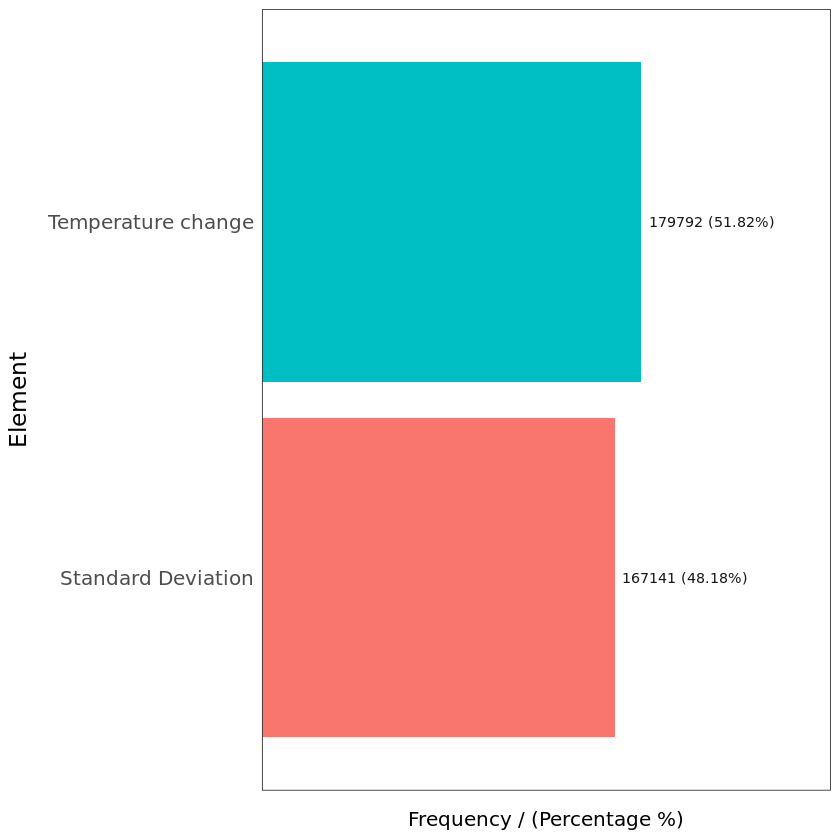

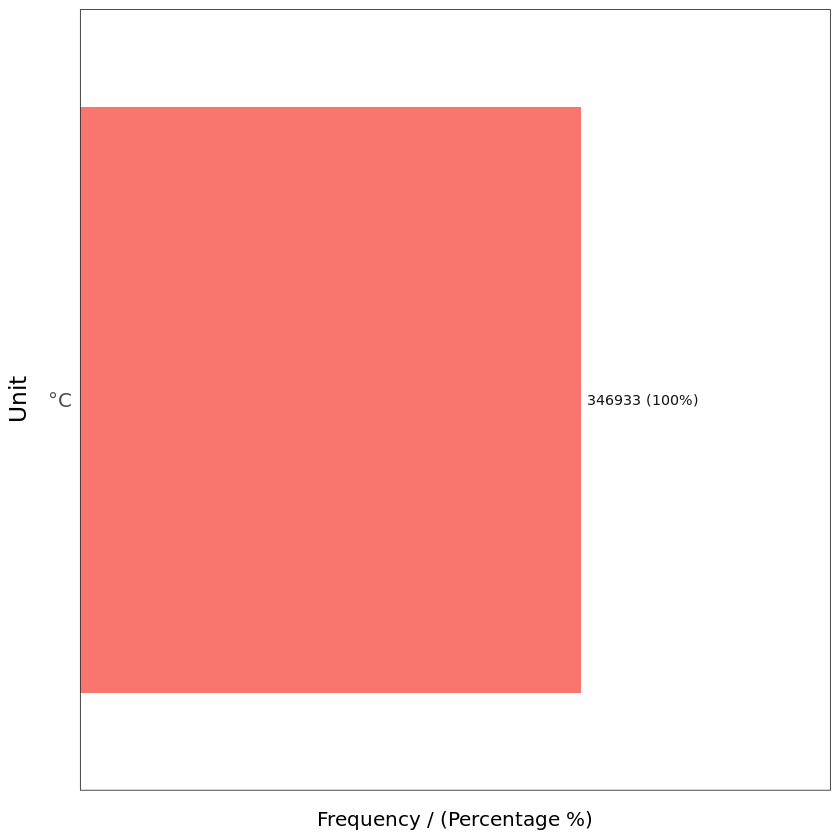

data04 

 9  Variables      346933  Observations
--------------------------------------------------------------------------------
Area.Code 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  346933        0      284        1    911.2     1403       14       28 
     .25      .50      .75      .90      .95 
      74      150      226     5207     5501 

lowest :    1    2    3    4    5, highest: 5815 5817 5848 5849 5873
                                                                            
Value          0    50   100   150   200   250   300   350  5000  5100  5200
Frequency  30484 57165 58164 55021 59173 32566  1632  1416  1416  8496  7080
Proportion 0.088 0.165 0.168 0.159 0.171 0.094 0.005 0.004 0.004 0.024 0.020
                                              
Value       5300  5400  5500  5700  5800  5850
Frequency   7416  7080  7080  1416  7080  4248
Proportion 0.021 0.020 0.020 0.004 0.020 0.012

For the frequency table, variable is rounded to the ne

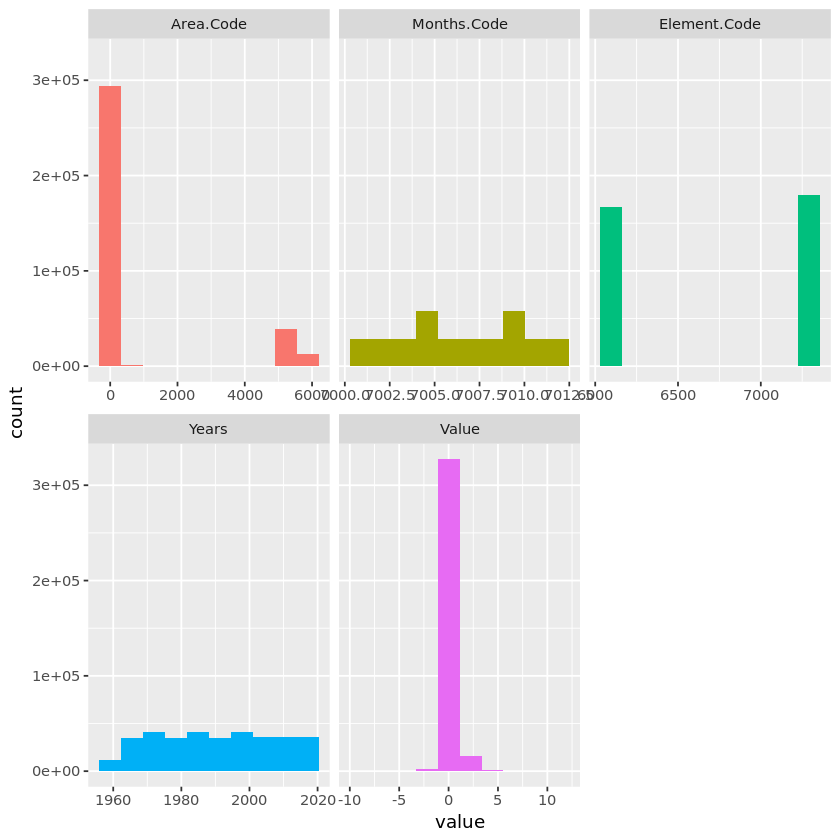

In [35]:
data04_eda <- function(data04)
{
  glimpse(data04)
  print(status(data04))
  freq(data04) 
  print(profiling_num(data04))
  plot_num(data04)
  describe(data04)
}
data04_eda(data04)

In [36]:
df1 <- data04 %>%                           
  group_by(Years) %>% 
  dplyr::summarize(Average_Temperature = mean(Value, na.rm = TRUE))

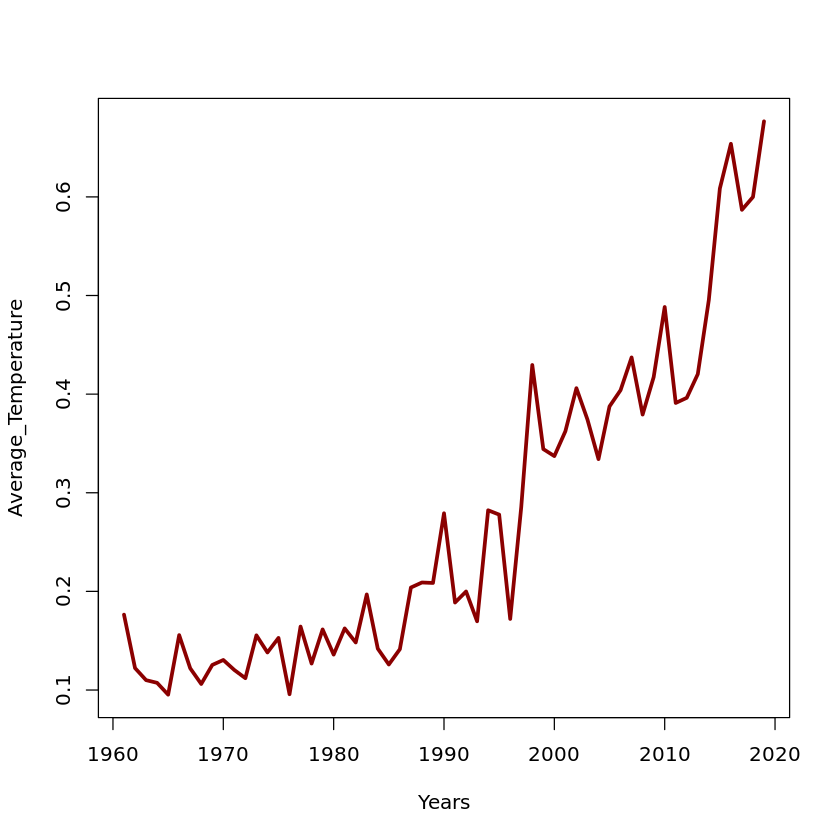

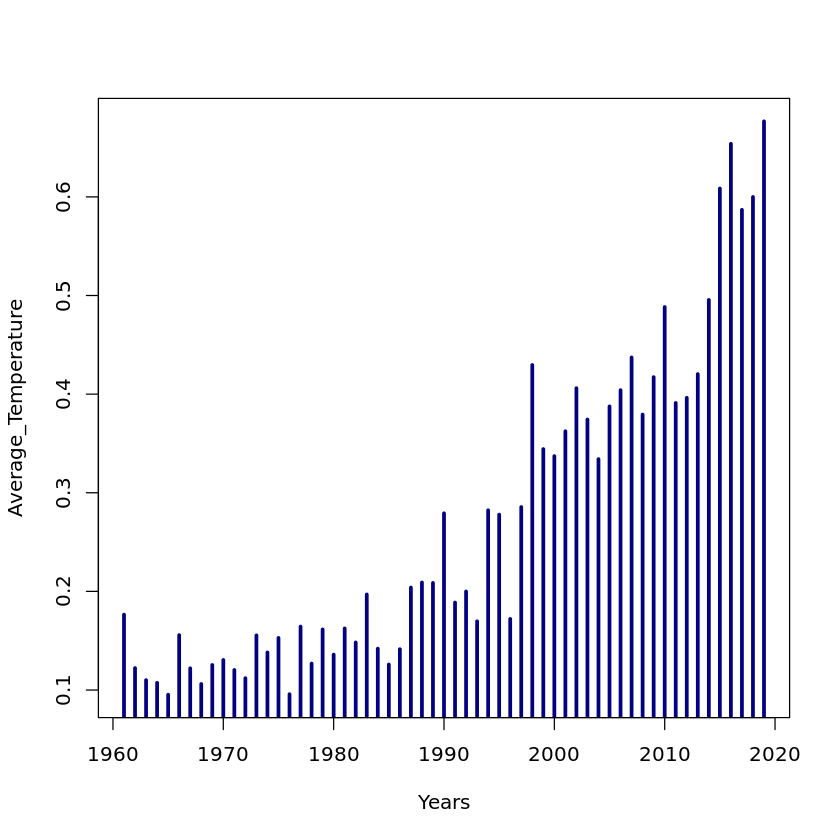

In [37]:
plot(Average_Temperature ~ Years, data=df1, type = 'l', col = 'darkred', lwd =3)
plot(Average_Temperature ~ Years, data=df1, type = 'h', col = 'navy', lwd =3)

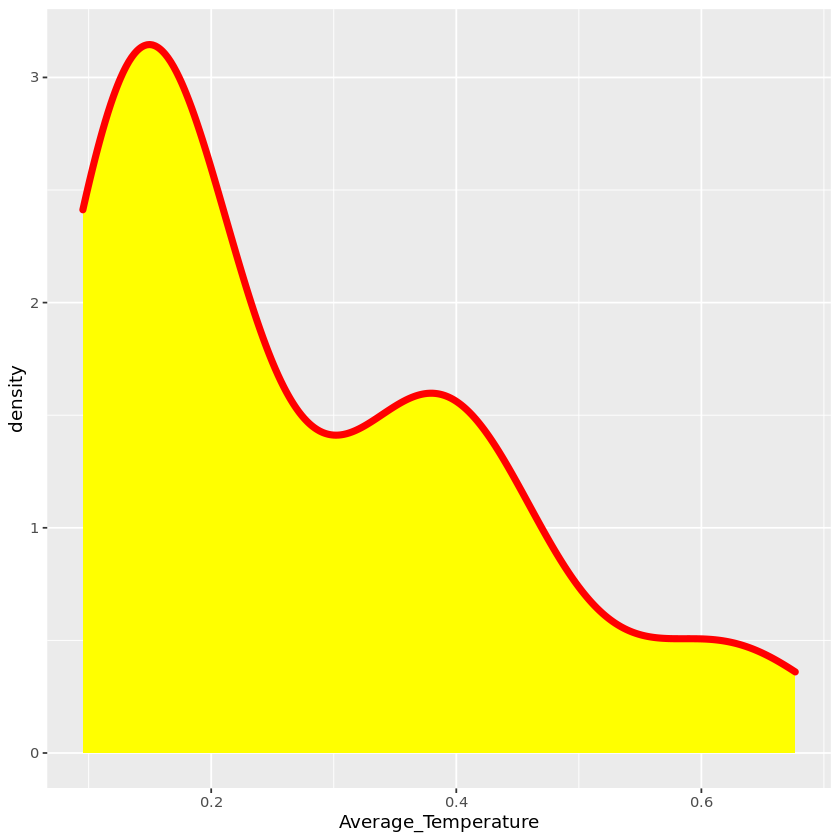

In [38]:
ggplot(df1, aes(x=Average_Temperature, color=Years)) + 
  geom_density(color="red", fill="yellow", lwd=2)

In [39]:
status(data04)

,variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
Area.Code,Area.Code,0,0.0000000,0,0,0,0,integer,284
Area,Area,0,0.0000000,0,0,0,0,factor,284
Months.Code,Months.Code,0,0.0000000,0,0,0,0,integer,12
Months,Months,0,0.0000000,0,0,0,0,factor,12
Element.Code,Element.Code,0,0.0000000,0,0,0,0,integer,2
Element,Element,0,0.0000000,0,0,0,0,factor,2
Unit,Unit,0,0.0000000,0,0,0,0,character,1
Years,Years,0,0.0000000,0,0,0,0,integer,59
Value,Value,253432,0.7304926,0,0,0,0,numeric,21


In [40]:
dim(data04)

[1] 346933      9

In [48]:
str(data04)

'data.frame':	346933 obs. of  9 variables:
 $ Area.Code   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Area        : Factor w/ 284 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Months.Code : int  7001 7001 7002 7002 7003 7003 7004 7004 7005 7005 ...
 $ Months      : Factor w/ 12 levels "April","August",..: 5 5 4 4 8 8 1 1 9 9 ...
 $ Element.Code: int  7271 6078 7271 6078 7271 6078 7271 6078 7271 6078 ...
 $ Element     : Factor w/ 2 levels "Standard Deviation",..: 2 1 2 1 2 1 2 1 2 1 ...
 $ Unit        : chr  "°C" "°C" "°C" "°C" ...
 $ Years       : int  1961 1961 1961 1961 1961 1961 1961 1961 1961 1961 ...
 $ Value       : num  0 1 -1 2 0 1 -1 1 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:55211] 241 242 243 244 245 246 247 248 249 250 ...
  ..- attr(*, "names")= chr [1:55211] "241" "242" "243" "244" ...


In [46]:
head(model.matrix(Element ~ Area.Code + Area + Months.Code + Months + Years, data = data04))

,(Intercept),Area.Code,AreaAfrica,AreaAlbania,AreaAlgeria,AreaAmerican Samoa,AreaAmericas,AreaAndorra,AreaAngola,AreaAnguilla,⋯,MonthsFebruary,MonthsJanuary,MonthsJuly,MonthsJune,MonthsMarch,MonthsMay,MonthsNovember,MonthsOctober,MonthsSeptember,Years
1,1,2,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1961
2,1,2,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1961
3,1,2,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,1961
4,1,2,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,1961
5,1,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1961
6,1,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1961


In [47]:
data04_dm <- dummyVars(Element ~ Area.Code + Area + Months.Code + Months + Years , data = data04)
head(predict(data04_dm, newdata = data04))

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
“variable 'Element' is not a factor”


,Area.Code,Area.Afghanistan,Area.Africa,Area.Albania,Area.Algeria,Area.American Samoa,Area.Americas,Area.Andorra,Area.Angola,Area.Anguilla,⋯,Months.February,Months.January,Months.July,Months.June,Months.March,Months.May,Months.November,Months.October,Months.September,Years
1,2,1,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1961
2,2,1,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1961
3,2,1,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,1961
4,2,1,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,1961
5,2,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1961
6,2,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,1961


In [50]:
head(data04)

,Area.Code,Area,Months.Code,Months,Element.Code,Element,Unit,Years,Value
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<chr>,<int>,<dbl>
1,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0
2,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1961,1
3,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1
4,2,Afghanistan,7002,February,6078,Standard Deviation,°C,1961,2
5,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0
6,2,Afghanistan,7003,March,6078,Standard Deviation,°C,1961,1


In [83]:
df2 <- data04[ ,c("Area.Code", "Months.Code", "Element.Code", "Years", "Value")]
# Checking the dim
dim(df2)

[1] 346933      5

In [84]:
# Identifying Correlated Predictors
descrCor <-  cor(df2)

In [85]:
highCorr <- sum(abs(descrCor[upper.tri(descrCor)]) > .999)

In [86]:
descrCor

,Area.Code,Months.Code,Element.Code,Years,Value
Area.Code,1.000000e+00,-2.009126e-05,-0.0121269952,8.226822e-04,-0.050355269
Months.Code,-2.009126e-05,1.000000e+00,0.0000258875,-1.014059e-05,-0.060309284
Element.Code,-1.212700e-02,2.588750e-05,1.0000000000,2.879039e-02,0.009876368
Years,8.226822e-04,-1.014059e-05,0.0287903936,1.000000e+00,0.201347021
Value,-5.035527e-02,-6.030928e-02,0.0098763676,2.013470e-01,1.000000000


In [57]:
library(corrplot)

corrplot 0.90 loaded


Attaching package: ‘corrplot’


The following object is masked from ‘package:pls’:

    corrplot




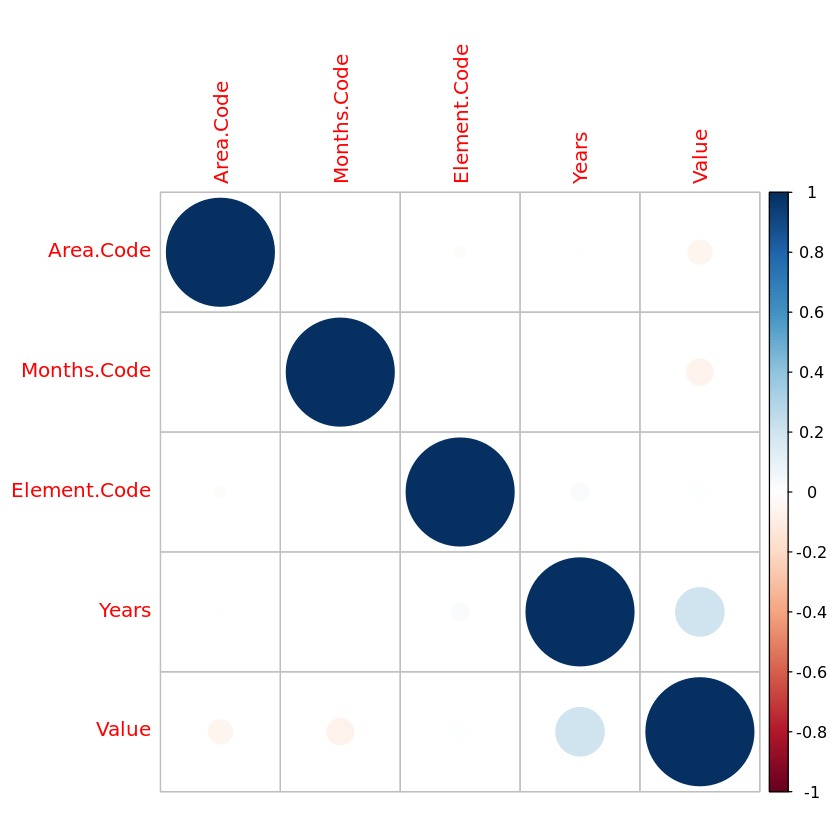

In [87]:
corrplot(descrCor)

In [88]:
df3 <- data04[ ,c("Area.Code", "Months.Code", "Months", "Element.Code", "Element", "Years", "Value")]
# Checking the dim
dim(df3)

[1] 346933      7

In [90]:
d04_comboInfo <- findLinearCombos(df2)
d04_comboInfo

$linearCombos
list()

$remove
NULL

In [91]:
head(df3)

,Area.Code,Months.Code,Months,Element.Code,Element,Years,Value
,<int>,<int>,<fct>,<int>,<fct>,<int>,<dbl>
1,2,7001,January,7271,Temperature change,1961,0
2,2,7001,January,6078,Standard Deviation,1961,1
3,2,7002,February,7271,Temperature change,1961,-1
4,2,7002,February,6078,Standard Deviation,1961,2
5,2,7003,March,7271,Temperature change,1961,0
6,2,7003,March,6078,Standard Deviation,1961,1


In [92]:
df3_pp_hpc <- preProcess(df3[, -8], 
                     method = c("center", "scale", "YeoJohnson"))
df3_pp_hpc

Created from 346933 samples and 7 variables

Pre-processing:
  - centered (5)
  - ignored (2)
  - scaled (5)
  - Yeo-Johnson transformation (4)

Lambda estimates for Yeo-Johnson transformation:
-0.13, 0.68, 1.28, 0.73

In [93]:
df3_transformed <- predict(df3_pp_hpc, newdata = df3[, -8])
head(df3_transformed)

,Area.Code,Months.Code,Months,Element.Code,Element,Years,Value
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,-3.273346,-1.593220,January,0.9641746,Temperature change,-1.703316,-0.3395317
2,-3.273346,-1.593220,January,-1.0371535,Standard Deviation,-1.703316,1.0330477
3,-3.273346,-1.303506,February,0.9641746,Temperature change,-1.703316,-2.0315188
4,-3.273346,-1.303506,February,-1.0371535,Standard Deviation,-1.703316,2.2231639
5,-3.273346,-1.013806,March,0.9641746,Temperature change,-1.703316,-0.3395317
6,-3.273346,-1.013806,March,-1.0371535,Standard Deviation,-1.703316,1.0330477


In [94]:
set.seed(3456)
trainIndex <- createDataPartition(df3$Element.Code, p = .8, 
                                  list = FALSE, 
                                  times = 1)
head(trainIndex)

Resample1
1
2
4
5
7
8


In [95]:
df3_Train <- df3[ trainIndex,]
df3_Test  <- df3[-trainIndex,]

In [74]:
#install.packages('gbm')
library(gbm)

Installing package into ‘/home/mladenoffj/R_libs’
(as ‘lib’ is unspecified)

Loaded gbm 2.1.8



In [96]:
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

In [99]:
#install.packages('e1071')
library(e1071)

Installing package into ‘/home/mladenoffj/R_libs’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’



Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute




In [ ]:
gbmFit1 <- train(Element ~ ., data = df3_Train, 
                 method = "gbm", 
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = FALSE)
gbmFit1